# Import Libraries

In [10]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU


# Load Datset-KDD

In [2]:
df = pd.read_csv('kdd.csv',header=0)
df=df.drop(['service','flag'], axis=1)
print(df)
df['class'] = df['class'].replace(['anomaly'], 1)
df['class'] = df['class'].replace(['normal'], 0)

df['protocol_type'] = df['protocol_type'].replace(['udp'], 0)
df['protocol_type'] = df['protocol_type'].replace(['tcp'], 1)
df['protocol_type'] = df['protocol_type'].replace(['icmp'], 2)

print(df)


          id  duration protocol_type  src_bytes  dst_bytes  land  \
0          1         0           tcp          0          0     0   
1          2         0           tcp          0          0     0   
2          3         2           tcp      12983          0     0   
3          4         0          icmp         20          0     0   
4          5         1           tcp          0         15     0   
...      ...       ...           ...        ...        ...   ...   
22539  22540         0           tcp        794        333     0   
22540  22541         0           tcp        317        938     0   
22541  22542         0           tcp      54540       8314     0   
22542  22543         0           udp         42         42     0   
22543  22544         0           tcp          0          0     0   

       wrong_fragment  urgent  hot  num_failed_logins  ...  \
0                   0       0    0                  0  ...   
1                   0       0    0                  0  ... 

# Assign X and Y

In [3]:
X=df.drop(columns=['class'])
y=df['class']
print(X)


          id  duration  protocol_type  src_bytes  dst_bytes  land  \
0          1         0              1          0          0     0   
1          2         0              1          0          0     0   
2          3         2              1      12983          0     0   
3          4         0              2         20          0     0   
4          5         1              1          0         15     0   
...      ...       ...            ...        ...        ...   ...   
22539  22540         0              1        794        333     0   
22540  22541         0              1        317        938     0   
22541  22542         0              1      54540       8314     0   
22542  22543         0              0         42         42     0   
22543  22544         0              1          0          0     0   

       wrong_fragment  urgent  hot  num_failed_logins  ...  dst_host_count  \
0                   0       0    0                  0  ...             255   
1              

In [11]:
names = df.head()


# Feature selection Technique

In [5]:
dtree = tree.DecisionTreeClassifier()
rfe = RFE(estimator=dtree, n_features_to_select=16)
rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print("Rank")
print(rfe.ranking_)
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))
mm=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))
print(mm)
cols=[mm[0][1],mm[1][1],mm[2][1],mm[3][1],mm[4][1],mm[5][1],mm[6][1],mm[7][1],mm[8][1],mm[9][1],mm[10][1],mm[11][1],mm[12][1],mm[13][1],mm[14][1],mm[15][1]]
print(cols)
print(df[cols])
X=df[cols]


[ True  True  True  True  True False  True False False False False False
 False False False False False False False False False  True  True False
 False False False False False  True  True  True  True  True  True  True
 False False False  True]
Rank
[ 1  1  1  1  1 19  1 13 15 14  7 18 12 20  6  3 21 16 23  9 24  1  1 22
 11  8 17  4 10  1  1  1  1  1  1  1  5 25  2  1]
Features sorted by their rank:
[(1, 'count'), (1, 'dst_bytes'), (1, 'dst_host_count'), (1, 'dst_host_diff_srv_rate'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_same_srv_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'dst_host_srv_rerror_rate'), (1, 'duration'), (1, 'id'), (1, 'protocol_type'), (1, 'src_bytes'), (1, 'srv_count'), (1, 'srv_diff_host_rate'), (1, 'wrong_fragment'), (2, 'dst_host_rerror_rate'), (3, 'num_file_creations'), (4, 'same_srv_rate'), (5, 'dst_host_serror_rate'), (6, 'num_root'), (7, 'logged_in'), (8, 'rerror_rate'), (9, 'is_host_login'), (10, 'diff_srv_rate'), (11

# Apply Standard Scalar

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)



sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Feature reduction through PCA

In [7]:
# Set the n_components=3
principal=PCA(n_components=3)
X_train=principal.fit_transform(X_train)
X_test=principal.fit_transform(X_test)
 
# Check the dimensions of data after PCA
print(X_train)


[[ 1.6815949  -0.33304106 -0.28223244]
 [ 1.71343254  0.43087786 -0.13886185]
 [-2.18240111 -0.94922889  0.80058651]
 ...
 [ 1.30130052 -1.92706264  0.22756362]
 [ 0.56843709 -0.60884518 -0.54798564]
 [ 4.91374565  0.86298043  0.79983515]]


# Build Deep Learning Mode

Epoch 1/5
2142/2142 [==============================] - 4s 1ms/step - loss: 0.3503 - accuracy: 0.8505 - val_loss: 0.4957 - val_accuracy: 0.8138
Epoch 2/5
2142/2142 [==============================] - 3s 1ms/step - loss: 0.2827 - accuracy: 0.8732 - val_loss: 0.6279 - val_accuracy: 0.7819
Epoch 3/5
2142/2142 [==============================] - 3s 1ms/step - loss: 0.2708 - accuracy: 0.8798 - val_loss: 0.6974 - val_accuracy: 0.7801
Epoch 4/5
2142/2142 [==============================] - 3s 1ms/step - loss: 0.2647 - accuracy: 0.8837 - val_loss: 0.6990 - val_accuracy: 0.7828
Epoch 5/5
2142/2142 [==============================] - 3s 1ms/step - loss: 0.2600 - accuracy: 0.8860 - val_loss: 0.7350 - val_accuracy: 0.8023


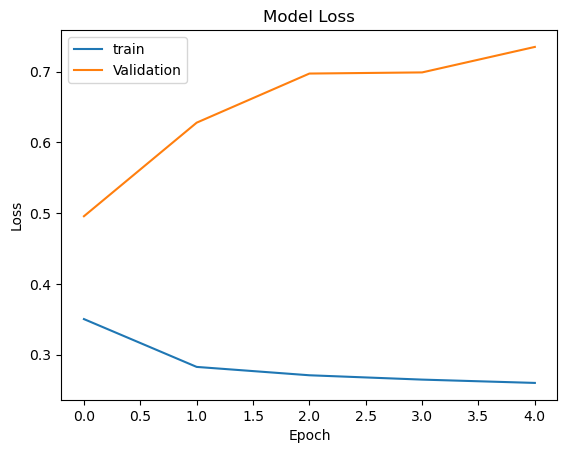

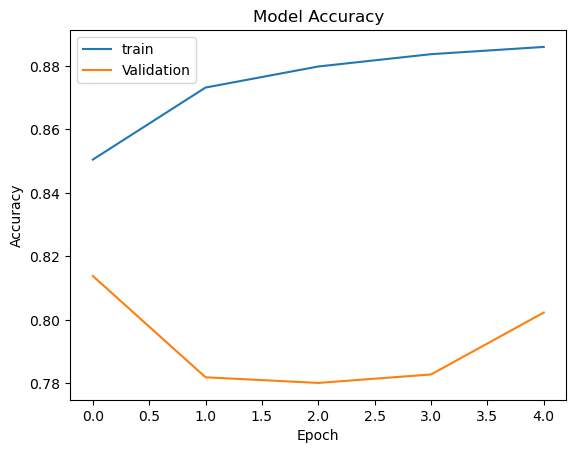

36/36 [==============================] - 0s 1ms/step


In [8]:
model= Sequential()

model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=3))
model.add(Dense(14, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train, epochs=5,batch_size=10,validation_data=(X_test, y_test))

#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.savefig('results/DNN Loss.png') 
plt.pause(5)
plt.show(block=False)
plt.close()

#train and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.savefig('results/DNN Accuracy.png') 
plt.pause(5)
plt.show(block=False)
plt.close()


y_pred=model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
